In [11]:
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [12]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [3]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)

In [4]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [1]:
import spacy
nlp = spacy.load('el_core_news_sm')

In [5]:
mediaGR_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Files/online_media_about_pakoe/mediaGR_workbench.csv')

In [31]:
articles_body = mediaGR_df[['publication year','body' ]]

In [32]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [33]:
matrix = vec.fit_transform(articles_body['body'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,αυτοκινητοδρομος,αυγουστος,βερολινο,βικτωρια,βοστωνη,γαμηλιο ταξιδι,γεννηση παιδιου,γαιδαρος,γατα,γερμανος,γιαννης,γνωστοποιηση,γυαλια,διακοπη,διευθυντρια σχολειου,διδυμοι,δεξαμενη,δευτερα παρουσια,δευτερον,δημοκρατια,διαρκεια ζωης,διαδρομη,διαλογισμος,διεθνες,διευθυνσεις,δραμα,εξαρτηση,εξωτερικου χωρου,επικοινωνω,επιπτωσεις,...,καρυδια,ωχρος,ελλειπων,προϊοντα,δικαιολογημενο,ενταλματα,κρεατοελλια,αποτυχημενος,σπαταλω,τροποι,ξεπερασμενο,αδιαβροχος,παντρευομαι,βοτανισμα,χωρις βαρος,παραξενα,καλωσορισατε,κρασπεδο,χελωνι,ηχηρο κτυπημα,απολυτως,πλατυς,ανθρωπινο ον,ανεξελεγκτη πυρκαγια,απροσδοκητα ευρημα,μαραμενο,αλιμονο,επιδεινωνεται,αποσπω βιαια,καρπος του χεριου,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
# List with anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# List with positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# List with sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# List with surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# List with disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# List with anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# List with negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# List with joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# List with trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

# List with fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [23]:
articles_body

,publication date,body
0,30.07.2009,"ΒΟΛΟΣ. Σε διαρροή πετρελαίου, που σημειώθηκε π..."
1,03.08.2016,Απάντηση στη σειρά πρόσφατων δημοσιευμάτων που...
2,01.12.2006,Τα πιο υψηλά πρόστιμα που έχουν επιβληθεί ποτέ...
3,13.10.2006,Εγκλημα διαρκείας συντελείται εναντίον δεκάδων...
4,24.09.2008,"Οι καιροί αλλάζουν, το μόνο βέβαιο. Κανείς δεν..."
...,...,...
203,25/11/2008,Πορεία διαμαρτυρίας κατά της χρήσης λιθάνθρακα...
204,20/02/2010,Την έναρξη των εργασιών θα κηρύξει ο γενικός γ...
205,31/03/2010,Παιδιά ηλικίας από 10 ως 14 ετών είναι τα συνη...
206,02/08/2016,«Ο Ευρωπαϊκός Οργανισμός Περιβάλλοντος (Europe...


In [36]:
articles_body['anger'] = wordcount_df[angry_words].sum(axis=1)

articles_body['positivity'] = wordcount_df[positive_words].sum(axis=1)

articles_body['joy'] = wordcount_df[joy_words].sum(axis=1)

articles_body['disgust'] = wordcount_df[disgust_words].sum(axis=1)

articles_body['surprise'] = wordcount_df[surprise_words].sum(axis=1)

articles_body['trust'] = wordcount_df[trust_words].sum(axis=1)

articles_body['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

articles_body['sadness'] = wordcount_df[sadness_words].sum(axis=1)

articles_body['negative'] = wordcount_df[negative_words].sum(axis=1)

articles_body['fear'] = wordcount_df[fear_words].sum(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [37]:
articles_body

,publication year,body,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2009,"ΒΟΛΟΣ. Σε διαρροή πετρελαίου, που σημειώθηκε π...",3,8,4,3,3,3,6,4,10,4
1,2016,Απάντηση στη σειρά πρόσφατων δημοσιευμάτων που...,5,12,5,3,3,6,12,5,10,4
2,2006,Τα πιο υψηλά πρόστιμα που έχουν επιβληθεί ποτέ...,7,18,6,5,1,13,4,5,13,7
3,2006,Εγκλημα διαρκείας συντελείται εναντίον δεκάδων...,7,15,3,4,3,10,8,6,14,7
4,2008,"Οι καιροί αλλάζουν, το μόνο βέβαιο. Κανείς δεν...",3,14,0,5,3,6,7,3,17,7
...,...,...,...,...,...,...,...,...,...,...,...,...
203,2008,Πορεία διαμαρτυρίας κατά της χρήσης λιθάνθρακα...,2,5,0,2,0,6,2,1,2,1
204,2010,Την έναρξη των εργασιών θα κηρύξει ο γενικός γ...,0,10,1,1,0,8,0,0,0,0
205,2010,Παιδιά ηλικίας από 10 ως 14 ετών είναι τα συνη...,9,16,6,7,5,9,10,8,20,9
206,2016,«Ο Ευρωπαϊκός Οργανισμός Περιβάλλοντος (Europe...,3,19,8,2,3,8,6,5,9,2


In [38]:
articles_body.set_index('publication year' , inplace=True)

In [43]:
# Import libraries
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


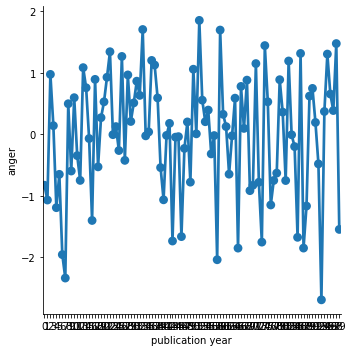

In [60]:
# Draft
articles_body['publication year'] = articles_body.index

sns.factorplot(x='publication year', y='anger', data=articles_body)

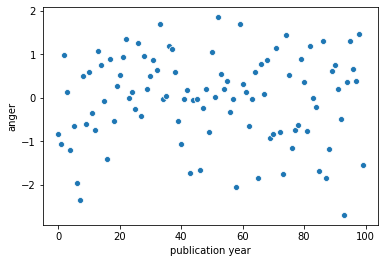

In [61]:
# Scatter plot (x-=publication year, y=anger)
ax = sns.scatterplot(x="publication year", y="anger", data=articles_body)